In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
feature_name_df = pd.read_csv('/Users/jiwanhwang/Documents/GitHub/PracticeMachineLearning/UCI_HAR_Dataset/features.txt',
                             sep = '\s+', header = None, names = ['column_index', 'coulumn_name'])

In [3]:
feature_name_df.head(3)

,column_index,coulumn_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z


In [4]:
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print(feature_name[:15])

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z']


In [12]:
def get_human_dataset():
    
    # Load feature names (list)
    feature_name_df = pd.read_csv('/Users/jiwanhwang/Documents/GitHub/PracticeMachineLearning/UCI_HAR_Dataset/features.txt',
                             sep = '\s+', header = None, names = ['column_index', 'coulumn_name'])
    feature_name = feature_name_df.iloc[:, 1].values.tolist()
    
    
    # Load train/test set, When I use "name=feature_name", it has error, so used .columns
    X_train = pd.read_csv('/Users/jiwanhwang/Documents/GitHub/PracticeMachineLearning/UCI_HAR_Dataset/train/X_train.txt',
                          sep = '\s+', header=None)
    X_train.columns = feature_name
    X_test = pd.read_csv('/Users/jiwanhwang/Documents/GitHub/PracticeMachineLearning/UCI_HAR_Dataset/test/X_test.txt',
                          sep = '\s+', header = None)
    X_test.columns = feature_name
    y_train = pd.read_csv('/Users/jiwanhwang/Documents/GitHub/PracticeMachineLearning/UCI_HAR_Dataset/train/y_train.txt',
                          sep = '\s+', header = None)
    y_train.columns = ['action']
    
    y_test = pd.read_csv('/Users/jiwanhwang/Documents/GitHub/PracticeMachineLearning/UCI_HAR_Dataset/test/y_test.txt', 
                          sep = '\s+', header = None)
    y_test.columns = ['action']
    
    return X_train, X_test, y_train, y_test


In [13]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [22]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [25]:
# Basic DT model without any parameter tuning
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy: {:.4f}'.format(accuracy))

Accuracy: 0.8548


In [26]:
# get parameters ".get_params()"
dt_clf.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 156,
 'splitter': 'best'}

In [35]:
# max_depth
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv =5, verbose=1, return_train_score=True)
grid_cv.fit(X_train, y_train)



Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=156,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=T

In [36]:
print('Best AVG Accuracy: {:.4f}'.format(grid_cv.best_score_))
print('Best max_depth: ', grid_cv.best_params_)

Best AVG Accuracy: 0.8526
Best max_depth:  {'max_depth': 8}


In [38]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns
cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]
# For 'mean_train_score', when making grid_cv instance, used parameter "return_train_score=True"

,param_max_depth,mean_test_score,mean_train_score
0,6,0.850925,0.944848
1,8,0.852557,0.982693
2,10,0.850925,0.993403
3,12,0.844124,0.997212
4,16,0.852149,0.999660
5,20,0.851605,0.999966
6,24,0.850245,1.000000


In [39]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth: {0}, accuracy: {1:.4f}'.format(depth, accuracy))

max_depth: 6, accuracy: 0.8558
max_depth: 8, accuracy: 0.8707
max_depth: 10, accuracy: 0.8673
max_depth: 12, accuracy: 0.8646
max_depth: 16, accuracy: 0.8575
max_depth: 20, accuracy: 0.8548
max_depth: 24, accuracy: 0.8548


In [41]:
params = {
    'max_depth':[8,12,16,20],
    'min_samples_split':[16, 24]
}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=24,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=156,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [8, 12, 16, 20],
                         'min_samples_split': [16, 24]},
             pre_dispatch='

In [42]:
print('Best AVG Accuracy: {:.4f}'.format(grid_cv.best_score_))
print('Best max_depth: ', grid_cv.best_params_)

Best AVG Accuracy: 0.8550
Best max_depth:  {'max_depth': 8, 'min_samples_split': 16}


In [43]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('Decision Tree Prediction Accuracy: {:.4f}'.format(accuracy))

Decision Tree Prediction Accuracy: 0.8717


In [46]:
feature_importances_values = best_df_clf.feature_importances_

feature_importances = pd.Series(feature_importances_values, index = X_train.columns)
print(feature_importances)
#feature_top20 = feature_importances.sort_value(ascending=False)[:20]

tBodyAcc-mean()-X                       0.000000
tBodyAcc-mean()-Y                       0.000000
tBodyAcc-mean()-Z                       0.000000
tBodyAcc-std()-X                        0.000000
tBodyAcc-std()-Y                        0.001752
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.001291
angle(tBodyGyroJerkMean,gravityMean)    0.000000
angle(X,gravityMean)                    0.000989
angle(Y,gravityMean)                    0.139001
angle(Z,gravityMean)                    0.002987
Length: 561, dtype: float64


In [49]:
feature_top20 = feature_importances.sort_values(ascending=False)[:20]
print(feature_top20)

tGravityAcc-min()-X                0.253354
fBodyAccJerk-bandsEnergy()-1,16    0.212584
angle(Y,gravityMean)               0.139001
fBodyAccMag-energy()               0.115478
tGravityAcc-arCoeff()-Z,2          0.101885
fBodyGyro-maxInds-X                0.023971
tGravityAcc-energy()-Y             0.020470
tBodyGyro-correlation()-Y,Z        0.016513
tGravityAccMag-arCoeff()1          0.015741
tBodyAcc-correlation()-X,Y         0.009972
fBodyAcc-max()-Y                   0.008825
tBodyGyro-max()-X                  0.008550
tGravityAcc-max()-Y                0.006290
fBodyGyro-max()-X                  0.005247
tBodyGyro-min()-X                  0.004373
tBodyAccJerk-correlation()-X,Y     0.003967
tBodyGyroJerk-max()-X              0.003471
tGravityAcc-arCoeff()-Y,3          0.003025
angle(Z,gravityMean)               0.002987
tGravityAcc-min()-Z                0.002912
dtype: float64


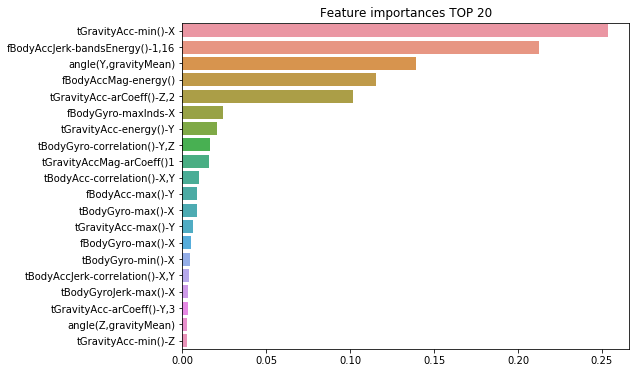

In [51]:
plt.figure(figsize=(8, 6))
plt.title('Feature importances TOP 20')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()